# Lab 6 - Recommender System
## Rigoberto Valadez Mena

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv("jester-data-1.csv", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [20]:
data.drop(0, axis=1, inplace=True)
data.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [21]:
data.replace(99, np.NaN, inplace=True)

In [23]:
data.iloc[4209, 45]

6.7

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24983 entries, 0 to 24982
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       16452 non-null  float64
 1   2       18184 non-null  float64
 2   3       16642 non-null  float64
 3   4       15608 non-null  float64
 4   5       24977 non-null  float64
 5   6       20431 non-null  float64
 6   7       24976 non-null  float64
 7   8       24981 non-null  float64
 8   9       15752 non-null  float64
 9   10      20324 non-null  float64
 10  11      21821 non-null  float64
 11  12      22423 non-null  float64
 12  13      24981 non-null  float64
 13  14      22515 non-null  float64
 14  15      24977 non-null  float64
 15  16      24975 non-null  float64
 16  17      24980 non-null  float64
 17  18      24979 non-null  float64
 18  19      24978 non-null  float64
 19  20      24980 non-null  float64
 20  21      24921 non-null  float64
 21  22      21433 non-null  float64
 2

In [41]:
data.mean().sort_values()

58   -3.833880
16   -3.104818
44   -2.111891
57   -1.990664
13   -1.762882
        ...   
32    3.155988
27    3.189821
36    3.312500
89    3.574720
50    3.665085
Length: 100, dtype: float64

In [10]:
n_latent_factors = 2

user_ratings = data.values
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [11]:
latent_item_features

array([[0.03195302, 0.26872159],
       [0.06330073, 0.71681243],
       [0.23331349, 0.92201317],
       [0.38201757, 0.75735515],
       [0.05579575, 0.80522131],
       [0.71506348, 0.25797984],
       [0.47557887, 0.55959455],
       [0.55421577, 0.36480665],
       [0.37661756, 0.42612365],
       [0.4610568 , 0.6046692 ],
       [0.90717702, 0.93179414],
       [0.26392258, 0.49423956],
       [0.33873631, 0.20223677],
       [0.23088828, 0.89598472],
       [0.38706429, 0.02639968],
       [0.55851294, 0.97544576],
       [0.34669506, 0.99976097],
       [0.35928029, 0.20717848],
       [0.75580576, 0.75141198],
       [0.94667565, 0.81128262],
       [0.61477696, 0.2816926 ],
       [0.86698908, 0.22598959],
       [0.76584024, 0.35913556],
       [0.55816386, 0.81515491],
       [0.61997648, 0.56009247],
       [0.58473484, 0.24261441],
       [0.50859622, 0.23750283],
       [0.43219958, 0.94542593],
       [0.92551681, 0.9806095 ],
       [0.67047946, 0.8776577 ],
       [0.

In [12]:
latent_user_preferences

array([[0.60104006, 0.40661203],
       [0.62764016, 0.65181366],
       [0.16156327, 0.58037189],
       ...,
       [0.82863859, 0.58843602],
       [0.38397712, 0.91443372],
       [0.00545571, 0.83970239]])

In [29]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if (not np.isnan(rating)) and (rating != 99):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 2) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

Iteration 0/10:	MSE=22.145577
Iteration 2/10:	MSE=21.770281
Iteration 4/10:	MSE=21.419032
Iteration 6/10:	MSE=21.073441
Iteration 8/10:	MSE=20.704017


ValueError: x and y must have same first dimension, but have shapes (10,) and (5,)

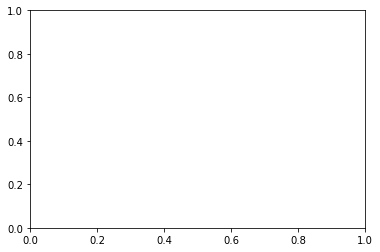

In [17]:
num_iter = 10
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 1), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [24]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[0.46619029, 0.4254616 , 0.36533671, ..., 0.67884699, 0.25006193,
        0.85957827],
       [1.517841  , 1.41742513, 1.36849191, ..., 1.74280684, 1.25130241,
        2.01158264],
       [3.5519625 , 3.29408908, 3.07519195, ..., 4.4107264 , 2.61743309,
        5.26696397],
       ...,
       [1.00117169, 0.93675488, 0.91276941, ..., 1.12316549, 0.8500471 ,
        1.28239998],
       [0.78604362, 0.71001966, 0.57511277, ..., 1.25134713, 0.32179927,
        1.62907842],
       [2.07706075, 1.90643114, 1.68796035, ..., 2.8672367 , 1.26123089,
        3.5648946 ]])

In [25]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = data.columns

In [26]:
comparison_data
# For each data point, the number on the left is the original value from the dataset, the number on the right is the prediction

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, 0.4661902850842502)","(8.79, 0.42546160006242634)","(-9.66, 0.3653367052376964)","(-8.16, -0.1925453986283849)","(-7.52, 0.4169683537199306)","(-8.5, 0.870732880999715)","(-9.85, 0.07018529396373435)","(4.17, -0.153735480725316)","(-8.98, -0.03611719287739383)","(-4.76, 0.558490900616519)",...,"(2.82, 0.8717952967813535)","(nan, 0.682527209900916)","(nan, 1.0616271454680528)","(nan, 0.49530289014035234)","(nan, 0.5429451290589976)","(nan, 0.7074419907695174)","(-5.63, 0.8085414921526448)","(nan, 0.6788469934543196)","(nan, 0.25006192557020757)","(nan, 0.859578274210652)"
1,"(4.08, 1.5178410033867071)","(-0.29, 1.4174251316374802)","(6.36, 1.368491905833176)","(4.37, 0.6253633638038684)","(-2.38, 1.1575507619625005)","(-9.66, 2.317874334487939)","(-0.73, 0.6339495317774468)","(-5.34, 0.20346846543151176)","(8.88, 0.9605747837120208)","(9.22, 1.7001779078159929)",...,"(2.82, 2.1071412827410536)","(-4.95, 1.8651087586179378)","(-0.29, 2.4416641086263264)","(7.86, 1.692759953599941)","(-0.19, 1.6185377564738144)","(-2.14, 1.9487201916569534)","(3.06, 1.9054000257318449)","(0.34, 1.7428068378545571)","(-4.32, 1.2513024055938287)","(1.07, 2.011582643619103)"
2,"(nan, 3.5519625033848774)","(nan, 3.294089081821678)","(nan, 3.075191945891415)","(nan, 0.5731264153892713)","(9.03, 2.8510476410980075)","(9.27, 5.791787934417296)","(9.03, 1.1952800268768171)","(9.27, -0.02437849251666436)","(nan, 1.4813429731917824)","(nan, 4.0626777649432455)",...,"(nan, 5.450925717187182)","(nan, 4.618496807618535)","(nan, 6.435342704782158)","(9.08, 3.9043259067127205)","(nan, 3.8936863641865957)","(nan, 4.812387023346885)","(nan, 4.975834466381832)","(nan, 4.41072639548501)","(nan, 2.617433085317313)","(nan, 5.26696397376386)"
3,"(nan, 1.5064886785699803)","(8.35, 1.3891242461012137)","(nan, 1.2598268023339698)","(nan, -0.0678618212952706)","(1.8, 1.2588792756022051)","(8.16, 2.5848586781412832)","(-2.82, 0.4062806922663838)","(6.21, -0.18514717392180033)","(nan, 0.3605669061505328)","(1.84, 1.7524419342346276)",...,"(nan, 2.493474010810214)","(nan, 2.047503311399581)","(nan, 2.9813972591560036)","(0.53, 1.636038730416587)","(nan, 1.6884716355435496)","(nan, 2.12911869134767)","(nan, 2.290930626637347)","(nan, 1.9867747632922308)","(nan, 1.0015843359913927)","(nan, 2.4293014628668343)"
4,"(8.5, 3.0197472979183817)","(4.61, 2.8045016940605505)","(-4.17, 2.6365971190712765)","(-5.39, 0.642424836532721)","(1.36, 2.3990684585982502)","(1.6, 4.859888560027273)","(7.04, 1.0664227290974495)","(4.61, 0.06651133262300679)","(-0.44, 1.3929841562037248)","(5.73, 3.439294369773463)",...,"(5.19, 4.543558465919849)","(5.58, 3.882226446836229)","(4.27, 5.345338627664758)","(5.19, 3.3292433276412154)","(5.73, 3.291779583959666)","(1.55, 4.047373652060946)","(3.11, 4.140174252824348)","(6.55, 3.6919174419874192)","(1.8, 2.2794132403807854)","(1.6, 4.380248761525886)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,"(0.44, 2.8195518311148193)","(7.43, 2.6187153935298295)","(9.08, 2.4625777874482244)","(2.33, 0.6052565604354712)","(3.2, 2.2391551466082813)","(6.75, 4.535461413596261)","(-8.79, 0.9974790765521747)","(-0.53, 0.06514987391659424)","(-8.74, 1.3053034971015474)","(7.23, 3.210773199558296)",...,"(8.83, 4.239175234061401)","(-1.21, 3.62330655300669)","(9.22, 4.986573469271719)","(-6.7, 3.1088766154252396)","(8.45, 3.0729036481080034)","(9.03, 3.7775160448590355)","(6.55, 3.8625517502648785)","(8.69, 3.4451365465537496)","(8.79, 2.130191108778209)","(7.43, 4.0864507144106685)"
24979,"(9.13, 0.3255795704207732)","(-8.16, 0.3054801623743476)","(8.59, 0.301551808406922)","(9.08, 0.1901592443802295)","(0.87, 0.23934861547383132)","(-8.93, 0.47405688510359345)","(-3.5, 0.15411983398059204)","(5.78, 0.07513686111637626)","(-8.11, 0.25427490006209996)","(4.9, 0.3594046186787673)",...,"(-1.17, 0.4192727609233846)","(-5.73, 0.38409528298717766)","(-1.46, 0.47

In [68]:
movies = pd.read_excel('movies_latent_factors.xlsx', sheet_name='Items')
movies.head()

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,11,Star Wars: Episode IV - A New Hope (1977),-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
1,12,Finding Nemo (2003),-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993
2,13,Forrest Gump (1994),-2.240888,-0.438815,-2.275177,0.614548,0.904469,0.711919,-0.420876,1.302036,-0.868418,-0.160122,0.633667,0.133138,-0.330276,-2.209004,-0.419092
3,14,American Beauty (1999),-0.634531,2.186059,-0.066681,0.086197,0.517558,-0.185319,-0.412352,0.063841,0.075937,-0.577682,0.526803,-1.465557,-0.819682,0.549010,-0.681191
4,22,Pirates of the Caribbean: The Curse of the Bla...,0.517348,-1.456763,0.369161,0.073903,-0.098332,-0.594722,0.828888,0.033626,-0.707414,0.717877,1.394326,-0.786986,1.429191,0.855746,-2.292566


In [69]:
users = pd.read_excel('movies_latent_factors.xlsx', sheet_name='Users')
users.head()

,User,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,4768,-0.204024,0.161079,-0.090447,0.138495,-0.162934,0.163894,0.051502,-0.088582,0.126829,0.065967,0.085008,0.355404,0.007108,-0.118663,-0.039125
1,156,-0.189652,-0.178979,-0.091490,-0.000823,-0.032646,0.177209,-0.098123,-0.068283,-0.011575,0.120866,-0.009931,-0.048606,0.045916,0.113671,0.179873
2,5323,-0.115308,-0.090886,-0.053129,0.018472,-0.068081,-0.004828,0.113005,0.102107,0.034758,0.000693,-0.073712,-0.019460,0.108372,0.054471,-0.109552
3,174,-0.227462,-0.272532,-0.017231,0.054324,0.214755,-0.072639,-0.033122,-0.086508,-0.131479,0.180403,0.095890,-0.082396,0.036767,-0.165438,0.050692
4,4529,-0.014616,-0.102218,-0.107935,0.155784,-0.123362,-0.118228,-0.013549,-0.050622,0.058698,-0.159600,-0.142382,-0.132836,-0.039897,0.129063,0.102669


In [76]:
movies['Factor14'].idxmin()

43

In [79]:
movies.iloc[43]

Movie ID                    558
Title       Spider-Man 2 (2004)
Factor1                2.235223
Factor2               -0.788129
Factor3                0.596722
Factor4               -0.400082
Factor5               -1.246623
Factor6               -1.507203
Factor7               -0.219911
Factor8               -0.486254
Factor9                0.331657
Factor10              -1.833755
Factor11               -2.24334
Factor12              -1.197938
Factor13              -1.450812
Factor14              -2.381119
Factor15              -0.455753
Name: 43, dtype: object

In [93]:
a1 = movies[movies['Movie ID'] == 194].drop(['Title', 'Movie ID'], axis=1).values

In [94]:
a2 = users[users['User'] == 3947].drop('User', axis=1).values

In [95]:
a3 = a1 * a2

In [96]:
a3.sum()

0.12529738259771594

In [97]:
users[users['User'] == 2067]

,User,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
11,2067,-0.083242,0.181171,-0.344267,-0.019713,-0.243199,0.03922,-0.092086,0.114808,-0.036472,0.042386,-0.186812,-0.127038,0.176661,-0.055812,-0.000042
